              precision    recall  f1-score   support

    Not Spam       1.00      0.97      0.98        29
        Spam       0.97      1.00      0.98        31

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



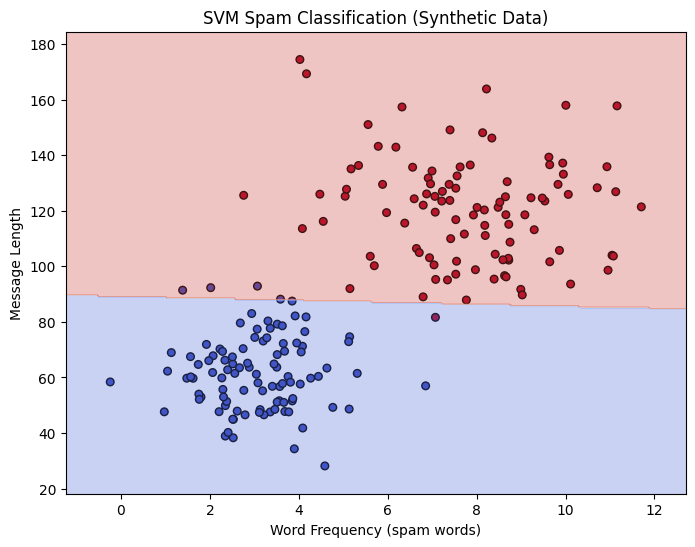

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


np.random.seed(42)
n_samples = 200

word_freq_spam = np.random.normal(8, 2, n_samples//2)
msg_len_spam = np.random.normal(120, 20, n_samples//2)

word_freq_ham = np.random.normal(3, 1, n_samples//2)
msg_len_ham = np.random.normal(60, 15, n_samples//2)

X = np.vstack((
    np.column_stack((word_freq_spam, msg_len_spam)),
    np.column_stack((word_freq_ham, msg_len_ham))
))
y = np.array([1]*(n_samples//2) + [0]*(n_samples//2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-10, X[:,1].max()+10, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.xlabel("Word Frequency (spam words)")
plt.ylabel("Message Length")
plt.title("SVM Spam Classification (Synthetic Data)")
plt.show()
